# Histopathologic Cancer Detection

In [1]:
###################################################
###################################################
# Abhyuday Puri (ap3758)                          #
# Columbia University                             #
# ECBM E6040                                      #
###################################################
###################################################

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.model_selection import train_test_split
import csv

C:\Users\prane\Anaconda3\envs\speech\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


### Read the labelled data and split it into training and validation

In [2]:
# Reading the image ids and labels
label = pd.read_csv('../data/train_labels.csv')

# Splitting the data into training and validation with a 80/20 split
train, val = train_test_split(label, test_size=0.2, shuffle=False)

# Re-indexing the validation dataframe
val = val.reset_index(drop = True)

print('Number of training examples:', train.shape[0])
print('Number of validation examples:', val.shape[0])

Number of training examples: 176020
Number of validation examples: 44005


### Creating the CNN architecture
This network consists of 3 convolutional layers, 2 fully connected layers, and Batch Normalization after every intermediate layer. I use the ReLU activation function at the output of every intermediate layer, and a Sigmoid activation at the final output.

In [3]:
# Defining the network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3)
        self.conv1_bn = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 256, 3)
        self.conv2_bn = nn.BatchNorm2d(256)
        self.conv3 = nn.Conv2d(256, 128, 3)
        self.conv3_bn = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 10 * 10, 64)
        self.fc1_bn = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1_bn(self.conv1(x))))
        x = self.pool(F.relu(self.conv2_bn(self.conv2(x))))
        x = self.pool(F.relu(self.conv3_bn(self.conv3(x))))
        x = x.view(-1, 128 * 10 * 10)
        x = F.relu(self.fc1_bn(self.fc1(x)))
        x = self.out_act(self.fc2(x))
        return x

### Creating the network and moving it onto the GPU (if available)

In [4]:
# Creating the network
net = Net()

# Checking if there is a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device being used =', device)

# Transferring the network onto the GPU
net.to(device)

# Ensuring that the model is in the training mode
net.train()

Device being used = cuda:0


Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=12800, out_features=64, bias=True)
  (fc1_bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (out_act): Sigmoid()
)

### Loss Function and Optimizer

In [5]:
# Choosing the loss function criteria
criterion = nn.BCELoss()    # This is the Binary Cross Entropy Loss Function

# Choosing the optimizer and its hyper-parameters
optimizer = optim.Adam(net.parameters(), lr=0.0001, betas=(0.9, 0.999), eps=1e-08)    # Adaptive Momentum Optimizer

### Setting the hyper-parameters for the training

In [7]:
# Get the number of train and val examples
num_train = train.shape[0]
num_val = val.shape[0]

# Hyper-Parameters
num_epochs = 5
batch_size = 200
num_iters = num_train // batch_size

## Training

epoch: 0, mini_batch: 200 loss: 0.48549992755055427
epoch: 0, mini_batch: 400 loss: 0.4191173976659775
epoch: 0, mini_batch: 600 loss: 0.3790909260511398
epoch: 0, mini_batch: 800 loss: 0.3589572809636593
epoch: 1, mini_batch: 200 loss: 0.33026263549923895
epoch: 1, mini_batch: 400 loss: 0.3192927210777998
epoch: 1, mini_batch: 600 loss: 0.3040379475057125
epoch: 1, mini_batch: 800 loss: 0.28980055086314677
epoch: 2, mini_batch: 200 loss: 0.2721355623751879
epoch: 2, mini_batch: 400 loss: 0.26051641188561914
epoch: 2, mini_batch: 600 loss: 0.25267469048500063
epoch: 2, mini_batch: 800 loss: 0.24934985160827636
epoch: 3, mini_batch: 200 loss: 0.22685006506741046
epoch: 3, mini_batch: 400 loss: 0.2178252487629652
epoch: 3, mini_batch: 600 loss: 0.2173678969591856
epoch: 3, mini_batch: 800 loss: 0.21474242232739926
epoch: 4, mini_batch: 200 loss: 0.18960166309028864
epoch: 4, mini_batch: 400 loss: 0.18701070252805949
epoch: 4, mini_batch: 600 loss: 0.18704144041985274
epoch: 4, mini_batch

/home/ecbm6040/dlenv/lib/python3.6/site-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


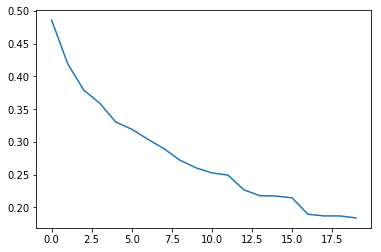

In [8]:
# Stores the loss through out the entire training
training_loss = []

# Variables to store the mini-batch data
batch_image = torch.zeros(batch_size, 3, 96, 96)
batch_y = torch.zeros(batch_size, 1)

# loop over the dataset multiple times
for epoch in range(num_epochs):  
    
    # Stores the loss for an entire mini-batch
    running_loss = 0.0
    
    # Shuffling the training dataset for each epoch
    train = train.sample(frac=1).reset_index(drop=True)
    
    # Loop over the entire training dataset
    for i in range(num_iters):
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Create the mini batch
        for j in range(batch_size):
            # get the inputs
            name = train['id'][i * batch_size + j] 
            y = train['label'][i * batch_size + j]
            # Read the image
            image = plt.imread('../data/train/' + name + '.tif')
            # Convert the image into a tensor
            image = torch.tensor(image).float()
            # Arrange the image in the desired order
            batch_image[j, :] = image.permute(2, 0, 1)
            # Converting the label to a tensor
            batch_y[j] = torch.tensor(y).float()
         
        # Moving the mini-batch onto the GPU
        batch_image, batch_y = batch_image.to(device), batch_y.to(device)
        
        # Forward Propogation
        outputs = net(batch_image)
        
        # Computng the loss
        loss = criterion(outputs, batch_y)
           
        # Back Propogation    
        loss.backward()
        
        # Updating the network parameters
        optimizer.step()
        
        # Print Loss
        running_loss += loss.item()
        if i % 200 == 0 and i != 0:    # print every 200 mini-batches
            print('epoch: {}, mini_batch: {} loss: {}'.format(epoch, i, running_loss / 200))
            training_loss.append(running_loss / 200)
            running_loss = 0.0
            
print('Finished Training')

# Saving the model
torch.save(net, 'Network_3_1.pth')
print('Model Saved')

# Plotting the loss curve
plt.plot(training_loss)

As can be seen, the training loss decreases with the number of iterations. 

## Validation

In [9]:
# Load the saved network
net = torch.load('Network_3_1.pth')

# Transferring the network onto the GPU
net.to(device)

# Ensuring the model runs in the test mode
# This freezes the values of the model parameters and does not update them
net.eval()

# Creating tensors to store the image and label
val_image = torch.zeros(1, 3, 96, 96)
val_y = torch.tensor(0).float()

# Stores the number of correct prediction our model makes
correct = 0

for j in range(num_val):
    # get the input data
    name = val['id'][j] 
    y = val['label'][j]
    
    # Read the image
    image = plt.imread('../data/train/' + name + '.tif')
    # Converting the image into a tensor
    image = torch.tensor(image).float()
    # Re-arranging the axis of the image into the desired order
    val_image[0, :] = image.permute(2, 0, 1)
    # Converting the label into a tensor
    val_y = torch.tensor(y).float()
    
    # Transferring the data onto the GPU
    val_image, val_y = val_image.to(device), val_y.to(device)
    
    # Running inference on the mini-batch
    outputs = net(val_image)

    # Checking the prediction with the ground truth label
    if outputs >= 0.5 and val_y == 1:
        correct += 1
    elif outputs < 0.5 and val_y ==0:
        correct += 1
        
print('Validation Accuracy:', 100 * correct / num_val)

Validation Accuracy: 90.18293375752755


## Testing

In [10]:
# Reading the test image names
test = pd.read_csv('../data/sample_submission.csv')
print('Number of testing examples:', test.shape[0])

# Storing the number of training examples
num_test = test.shape[0]

Number of testing examples: 57458


In [11]:
test_image = torch.zeros(1, 3, 96, 96)

# Creating the CSV file to store the result
with open('attempt_4.csv', 'wt') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    
    # Writing the header row for the submission file
    filewriter.writerow(['id', 'label'])
    for j in range(num_test):
        
        # get the input image name
        name = test['id'][j] 
        
        # Read the image
        image = plt.imread('../data/test/' + name + '.tif')
        image = torch.tensor(image).float()
        test_image[0, :] = image.permute(2, 0, 1)
    
        # Transferring data onto the GPU
        test_image = test_image.to(device)
        
        # Predicting the label for the input
        outputs = net(test_image)
        
        # Writing the label to the submission file
        if outputs >= 0.5:
            filewriter.writerow([name, 1])
        else:
            filewriter.writerow([name, 0])

This is the result of this network on the Kaggle Test dataset:

<img src="attempt_4.png" style="height:200px">

### Final Conclusion

I tried 3 networks for this task, and so far, this has given the best result. Below is a table that summarizes the results:

| Network     | Accuracy  |
|-------------|-----------|
|  Network 1  |   80.2    |
|  Network 1 + BN  |   82.7    |
|  Network 3  |   85.7    |

## Appendix

This section discusses the arhcitecture of the 3 networks (All filters are of size $ 3 \times 3$):

**<u>Network 1:</u>**

|    Layer       |    Number of Filters/Neurons |
|----------------|------------------------------|
|    conv1       |                64            |
|    maxpool     |                (2,2)         |
|    conv2       |                128           |
|    maxpool     |                (2,2)         |
|    conv3       |                128           |
|    maxpool     |                (2,2)         |
|    fc1         |                (12800, 64)   |
|    fc2         |                (64, 2)       |
|    sigmoid     |                (1, 2)        |

**<u>Network 2:</u>**

|    Layer       |    Number of Filters/Neurons |
|----------------|------------------------------|
|    conv1 + BN  |                64            |
|    maxpool     |                (2,2)         |
|    conv2 + BN  |                128           |
|    maxpool     |                (2,2)         |
|    conv3 + BN  |                128           |
|    maxpool     |                (2,2)         |
|    fc1 + BN    |                (12800, 64)   |
|    fc2         |                (64, 2)       |
|    sigmoid     |                (1, 2)        |

**<u>Network 3:</u>**

|    Layer       |    Number of Filters/Neurons |
|----------------|------------------------------|
|    conv1 + BN  |                64            |
|    maxpool     |                (2,2)         |
|    conv2 + BN  |                256           |
|    maxpool     |                (2,2)         |
|    conv3 + BN  |                128           |
|    maxpool     |                (2,2)         |
|    fc1 + BN    |                (12800, 64)   |
|    fc2         |                (64, 2)       |
|    sigmoid     |                (1, 2)        |
